# Data collection

## Loading data

In [1]:
import os
import sys
sys.path.append('..') # Add parent directory to path to always find flood_tool
                      # This is not best practice, but it works for this example

import pandas as pd
import matplotlib.pyplot as plt

import flood_tool as ft


In [2]:
# The labelled postcode data

df2 = pd.read_csv(os.path.join(ft._data_dir, 'postcodes_labelled.csv'))
df2.head()

postcode  easting  northing          soilType  elevation nearestWatercourse  \
0  BA1 1AL   374813    164571  Unsurveyed/Urban         20         River Avon   
1  BA1 1AN   375116    164500  Unsurveyed/Urban         20         River Avon   
2  BA1 1AR   375091    164454  Unsurveyed/Urban         20         River Avon   
3  BA1 1BG   375060    164969  Unsurveyed/Urban         30         River Avon   
4  BA1 1BH   375021    164930  Unsurveyed/Urban         30         River Avon   

   distanceToWatercourse                localAuthority  riskLabel  \
0                 1240.0  Bath and North East Somerset          5   
1                 1550.0  Bath and North East Somerset          3   
2                 1540.0  Bath and North East Somerset          5   
3                 1450.0  Bath and North East Somerset          1   
4                 1410.0  Bath and North East Somerset          1   

   medianPrice  historicallyFlooded  
0     621800.0                    1  
1     577900.0                    0  
2     533300.0                    1  
3     563600.0                    0  
4     570800.0                    0

## Merging sector data

In [3]:
# The data on households/population per sector

df3 = pd.read_csv(os.path.join(ft._data_dir, 'sector_data.csv'))
df3.head()


postcodeSector  households  numberOfPostcodeUnits  headcount
0         AL1  1        2546                    311       6080
1         AL1  2        2642                    236       6942
2         AL1  3        2272                    388       5821
3         AL1  4        3707                    339       9635
4         AL1  5        4406                    347      10560

In [4]:
sector_df=df3.copy()
sector_df['postcodeSector']=sector_df['postcodeSector'].str.replace(' ', '').str.upper()

sector_df


postcodeSector  households  numberOfPostcodeUnits  headcount
0              AL11        2546                    311       6080
1              AL12        2642                    236       6942
2              AL13        2272                    388       5821
3              AL14        3707                    339       9635
4              AL15        4406                    347      10560
...             ...         ...                    ...        ...
7547          NP167        2435                    203       6299
7548          NP253        2425                      5       4918
7549          NP254        1460                     17       3871
7550          NP255        2862                     15       7162
7551           NP78        1348                      2       3083

[7552 rows x 4 columns]

In [5]:
# Extract the postcode sector from the postcode
def extract_postcode_sector(postcode):
    
    return postcode[:-2].replace(' ','').upper()

df2_cp=df2.copy()
df2_cp['postcodeSector']=df2_cp['postcode'].apply(extract_postcode_sector)


merged_data = pd.merge(df2_cp, sector_df, on="postcodeSector", how="left")

merged_data



postcode  easting  northing          soilType  elevation  \
0      BA1 1AL   374813    164571  Unsurveyed/Urban         20   
1      BA1 1AN   375116    164500  Unsurveyed/Urban         20   
2      BA1 1AR   375091    164454  Unsurveyed/Urban         20   
3      BA1 1BG   375060    164969  Unsurveyed/Urban         30   
4      BA1 1BH   375021    164930  Unsurveyed/Urban         30   
...        ...      ...       ...               ...        ...   
79995   W6 0XA   521911    178821  Unsurveyed/Urban         10   
79996   W6 0XY   521796    179018  Unsurveyed/Urban         10   
79997   W6 0YE   521930    178998  Unsurveyed/Urban         10   
79998  WD3 1PZ   507392    191779         Planosols        100   
79999  WD3 2UX   504343    193039          Gleysols         50   

      nearestWatercourse  distanceToWatercourse                localAuthority  \
0             River Avon                 1240.0  Bath and North East Somerset   
1             River Avon                 1550.0  Bath and North East Somerset   
2             River Avon                 1540.0  Bath and North East Somerset   
3             River Avon                 1450.0  Bath and North East Somerset   
4             River Avon                 1410.0  Bath and North East Somerset   
...                  ...                    ...                           ...   
79995       River Thames                 1790.0                      Hounslow   
79996       River Thames                 2020.0                      Hounslow   
79997       River Thames                 1940.0                      Hounslow   
79998                NaN                 1790.0                    Hillingdon   
79999                NaN                  470.0                    Hillingdon   

       riskLabel  medianPrice  historicallyFlooded postcodeSector  households  \
0              5     621800.0                    1           BA11      1072.0   
1              3     577900.0                    0           BA11      1072.0   
2              5     533300.0                    1           BA11      1072.0   
3              1     563600.0                    0           BA11      1072.0   
4              1     570800.0                    0           BA11      1072.0   
...          ...          ...                  ...            ...         ...   
79995          4     623000.0                    0            W60      5682.0   
79996          4    2491200.0                    0            W60      5682.0   
79997          4    2469300.0                    0            W60      5682.0   
79998          1     654400.0                    0           WD31      2209.0   
79999          3          NaN                    0           WD32         NaN   

       numberOfPostcodeUnits  headcount  
0                      354.0     1987.0  
1                      354.0     1987.0  
2                      354.0     1987.0  
3                      354.0     1987.0  
4                      354.0     1987.0  
...                      ...        ...  
79995                  396.0    12635.0  
79996                  396.0    12635.0  
79997                  396.0    12635.0  
79998                  314.0     4469.0  
79999                    NaN        NaN  

[80000 rows x 15 columns]

## Merging district data

In [6]:
df4 = pd.read_csv(os.path.join(ft._data_dir, 'district_data.csv'))
df4.head()

postcodeDistrict  catsPerHousehold  dogsPerHousehold
0             AB10          0.164463          0.188610
1             AB11          0.206145          0.236411
2             AB12          0.300306          0.344397
3             AB13          1.145815          1.314045
4             AB14          1.008732          1.156835

In [7]:
# Extract the postcode district from the postcode
def extract_postcode_district(postcode):
    
    return postcode[:-4].upper()

df2_cpy=merged_data.copy()
df2_cpy['postcodeDistrict']=df2_cpy['postcode'].apply(extract_postcode_district)

# Merge the data
final_data = pd.merge(df2_cpy, df4, on="postcodeDistrict", how="left")

final_data=final_data.drop(columns=['postcodeSector','postcodeDistrict'])

In [8]:
final_data

postcode  easting  northing          soilType  elevation  \
0      BA1 1AL   374813    164571  Unsurveyed/Urban         20   
1      BA1 1AN   375116    164500  Unsurveyed/Urban         20   
2      BA1 1AR   375091    164454  Unsurveyed/Urban         20   
3      BA1 1BG   375060    164969  Unsurveyed/Urban         30   
4      BA1 1BH   375021    164930  Unsurveyed/Urban         30   
...        ...      ...       ...               ...        ...   
79995   W6 0XA   521911    178821  Unsurveyed/Urban         10   
79996   W6 0XY   521796    179018  Unsurveyed/Urban         10   
79997   W6 0YE   521930    178998  Unsurveyed/Urban         10   
79998  WD3 1PZ   507392    191779         Planosols        100   
79999  WD3 2UX   504343    193039          Gleysols         50   

      nearestWatercourse  distanceToWatercourse                localAuthority  \
0             River Avon                 1240.0  Bath and North East Somerset   
1             River Avon                 1550.0  Bath and North East Somerset   
2             River Avon                 1540.0  Bath and North East Somerset   
3             River Avon                 1450.0  Bath and North East Somerset   
4             River Avon                 1410.0  Bath and North East Somerset   
...                  ...                    ...                           ...   
79995       River Thames                 1790.0                      Hounslow   
79996       River Thames                 2020.0                      Hounslow   
79997       River Thames                 1940.0                      Hounslow   
79998                NaN                 1790.0                    Hillingdon   
79999                NaN                  470.0                    Hillingdon   

       riskLabel  medianPrice  historicallyFlooded  households  \
0              5     621800.0                    1      1072.0   
1              3     577900.0                    0      1072.0   
2              5     533300.0                    1      1072.0   
3              1     563600.0                    0      1072.0   
4              1     570800.0                    0      1072.0   
...          ...          ...                  ...         ...   
79995          4     623000.0                    0      5682.0   
79996          4    2491200.0                    0      5682.0   
79997          4    2469300.0                    0      5682.0   
79998          1     654400.0                    0      2209.0   
79999          3          NaN                    0         NaN   

       numberOfPostcodeUnits  headcount  catsPerHousehold  dogsPerHousehold  
0                      354.0     1987.0          0.407479          0.467305  
1                      354.0     1987.0          0.407479          0.467305  
2                      354.0     1987.0          0.407479          0.467305  
3                      354.0     1987.0          0.407479          0.467305  
4                      354.0     1987.0          0.407479          0.467305  
...                      ...        ...               ...               ...  
79995                  396.0    12635.0          0.206226          0.236504  
79996                  396.0    12635.0          0.206226          0.236504  
79997                  396.0    12635.0          0.206226          0.236504  
79998                  314.0     4469.0          0.338028          0.387658  
79999                    NaN        NaN          0.338028          0.387658  

[80000 rows x 16 columns]

In [9]:
missing1 = final_data.isnull().sum() / len(final_data)
missing1

postcode                 0.000000
easting                  0.000000
northing                 0.000000
soilType                 0.000000
elevation                0.000000
nearestWatercourse       0.376138
distanceToWatercourse    0.000000
localAuthority           0.000000
riskLabel                0.000000
medianPrice              0.077525
historicallyFlooded      0.000000
households               0.079687
numberOfPostcodeUnits    0.079687
headcount                0.079687
catsPerHousehold         0.049237
dogsPerHousehold         0.049237
dtype: float64

In [10]:

final_data=final_data.drop_duplicates()
final_data.duplicated().sum()

np.int64(0)

In [11]:
df=final_data.copy()
df

postcode  easting  northing          soilType  elevation  \
0      BA1 1AL   374813    164571  Unsurveyed/Urban         20   
1      BA1 1AN   375116    164500  Unsurveyed/Urban         20   
2      BA1 1AR   375091    164454  Unsurveyed/Urban         20   
3      BA1 1BG   375060    164969  Unsurveyed/Urban         30   
4      BA1 1BH   375021    164930  Unsurveyed/Urban         30   
...        ...      ...       ...               ...        ...   
79995   W6 0XA   521911    178821  Unsurveyed/Urban         10   
79996   W6 0XY   521796    179018  Unsurveyed/Urban         10   
79997   W6 0YE   521930    178998  Unsurveyed/Urban         10   
79998  WD3 1PZ   507392    191779         Planosols        100   
79999  WD3 2UX   504343    193039          Gleysols         50   

      nearestWatercourse  distanceToWatercourse                localAuthority  \
0             River Avon                 1240.0  Bath and North East Somerset   
1             River Avon                 1550.0  Bath and North East Somerset   
2             River Avon                 1540.0  Bath and North East Somerset   
3             River Avon                 1450.0  Bath and North East Somerset   
4             River Avon                 1410.0  Bath and North East Somerset   
...                  ...                    ...                           ...   
79995       River Thames                 1790.0                      Hounslow   
79996       River Thames                 2020.0                      Hounslow   
79997       River Thames                 1940.0                      Hounslow   
79998                NaN                 1790.0                    Hillingdon   
79999                NaN                  470.0                    Hillingdon   

       riskLabel  medianPrice  historicallyFlooded  households  \
0              5     621800.0                    1      1072.0   
1              3     577900.0                    0      1072.0   
2              5     533300.0                    1      1072.0   
3              1     563600.0                    0      1072.0   
4              1     570800.0                    0      1072.0   
...          ...          ...                  ...         ...   
79995          4     623000.0                    0      5682.0   
79996          4    2491200.0                    0      5682.0   
79997          4    2469300.0                    0      5682.0   
79998          1     654400.0                    0      2209.0   
79999          3          NaN                    0         NaN   

       numberOfPostcodeUnits  headcount  catsPerHousehold  dogsPerHousehold  
0                      354.0     1987.0          0.407479          0.467305  
1                      354.0     1987.0          0.407479          0.467305  
2                      354.0     1987.0          0.407479          0.467305  
3                      354.0     1987.0          0.407479          0.467305  
4                      354.0     1987.0          0.407479          0.467305  
...                      ...        ...               ...               ...  
79995                  396.0    12635.0          0.206226          0.236504  
79996                  396.0    12635.0          0.206226          0.236504  
79997                  396.0    12635.0          0.206226          0.236504  
79998                  314.0     4469.0          0.338028          0.387658  
79999                    NaN        NaN          0.338028          0.387658  

[80000 rows x 16 columns]

In [12]:
df.dropna(subset=['medianPrice'], inplace=True)

df['medianPrice'].isnull().sum() 

np.int64(0)

In [13]:
df['households_ave']=df['households']/df['numberOfPostcodeUnits']

In [14]:
df

postcode  easting  northing          soilType  elevation  \
0      BA1 1AL   374813    164571  Unsurveyed/Urban         20   
1      BA1 1AN   375116    164500  Unsurveyed/Urban         20   
2      BA1 1AR   375091    164454  Unsurveyed/Urban         20   
3      BA1 1BG   375060    164969  Unsurveyed/Urban         30   
4      BA1 1BH   375021    164930  Unsurveyed/Urban         30   
...        ...      ...       ...               ...        ...   
79994   W6 0SB   521913    178731  Unsurveyed/Urban         10   
79995   W6 0XA   521911    178821  Unsurveyed/Urban         10   
79996   W6 0XY   521796    179018  Unsurveyed/Urban         10   
79997   W6 0YE   521930    178998  Unsurveyed/Urban         10   
79998  WD3 1PZ   507392    191779         Planosols        100   

      nearestWatercourse  distanceToWatercourse                localAuthority  \
0             River Avon                 1240.0  Bath and North East Somerset   
1             River Avon                 1550.0  Bath and North East Somerset   
2             River Avon                 1540.0  Bath and North East Somerset   
3             River Avon                 1450.0  Bath and North East Somerset   
4             River Avon                 1410.0  Bath and North East Somerset   
...                  ...                    ...                           ...   
79994       River Thames                 1710.0                      Hounslow   
79995       River Thames                 1790.0                      Hounslow   
79996       River Thames                 2020.0                      Hounslow   
79997       River Thames                 1940.0                      Hounslow   
79998                NaN                 1790.0                    Hillingdon   

       riskLabel  medianPrice  historicallyFlooded  households  \
0              5     621800.0                    1      1072.0   
1              3     577900.0                    0      1072.0   
2              5     533300.0                    1      1072.0   
3              1     563600.0                    0      1072.0   
4              1     570800.0                    0      1072.0   
...          ...          ...                  ...         ...   
79994          4     465400.0                    0      5682.0   
79995          4     623000.0                    0      5682.0   
79996          4    2491200.0                    0      5682.0   
79997          4    2469300.0                    0      5682.0   
79998          1     654400.0                    0      2209.0   

       numberOfPostcodeUnits  headcount  catsPerHousehold  dogsPerHousehold  \
0                      354.0     1987.0          0.407479          0.467305   
1                      354.0     1987.0          0.407479          0.467305   
2                      354.0     1987.0          0.407479          0.467305   
3                      354.0     1987.0          0.407479          0.467305   
4                      354.0     1987.0          0.407479          0.467305   
...                      ...        ...               ...               ...   
79994                  396.0    12635.0          0.206226          0.236504   
79995                  396.0    12635.0          0.206226          0.236504   
79996                  396.0    12635.0          0.206226          0.236504   
79997                  396.0    12635.0          0.206226          0.236504   
79998                  314.0     4469.0          0.338028          0.387658   

       households_ave  
0            3.028249  
1            3.028249  
2            3.028249  
3            3.028249  
4            3.028249  
...               ...  
79994       14.348485  
79995       14.348485  
79996       14.348485  
79997       14.348485  
79998        7.035032  

[73798 rows x 17 columns]

In [15]:
df.describe()

easting       northing     elevation  distanceToWatercourse  \
count   73798.000000   73798.000000  73798.000000            73798.00000   
mean   450526.585300  136040.230602     53.957153             1512.33299   
std    111682.189863   38973.019504     43.903206             1493.30102   
min     90098.000000   10216.000000    -10.000000                0.00000   
25%    368078.250000  105841.500000     20.000000              630.00000   
50%    484427.000000  147593.500000     40.000000             1100.00000   
75%    532036.000000  169334.000000     80.000000             1870.00000   
max    639867.000000  212063.000000    430.000000            47470.00000   

          riskLabel   medianPrice  historicallyFlooded    households  \
count  73798.000000  7.379800e+04         73798.000000  73609.000000   
mean       1.684978  5.141523e+05             0.029594   3434.557459   
std        1.213010  9.093642e+05             0.169466   1374.476166   
min        1.000000  1.000000e+02             0.000000    105.000000   
25%        1.000000  2.924000e+05             0.000000   2410.000000   
50%        1.000000  3.984000e+05             0.000000   3396.000000   
75%        2.000000  5.649750e+05             0.000000   4345.000000   
max        7.000000  6.540120e+07             1.000000   9704.000000   

       numberOfPostcodeUnits     headcount  catsPerHousehold  \
count           73609.000000  73609.000000      73798.000000   
mean              293.732832   8437.447527          0.472429   
std                66.375181   3641.852330          0.331850   
min                18.000000    173.000000          0.030856   
25%               252.000000   5727.000000          0.239429   
50%               301.000000   8143.000000          0.384864   
75%               345.000000  10716.000000          0.624204   
max               398.000000  25634.000000          4.982600   

       dogsPerHousehold  households_ave  
count      73798.000000    73609.000000  
mean           0.541791       11.636076  
std            0.380572        3.770209  
min            0.035386        0.662722  
25%            0.274582        8.920213  
50%            0.441371       11.440789  
75%            0.715850       14.061489  
max            5.714151       30.515723

# Dataset splitting

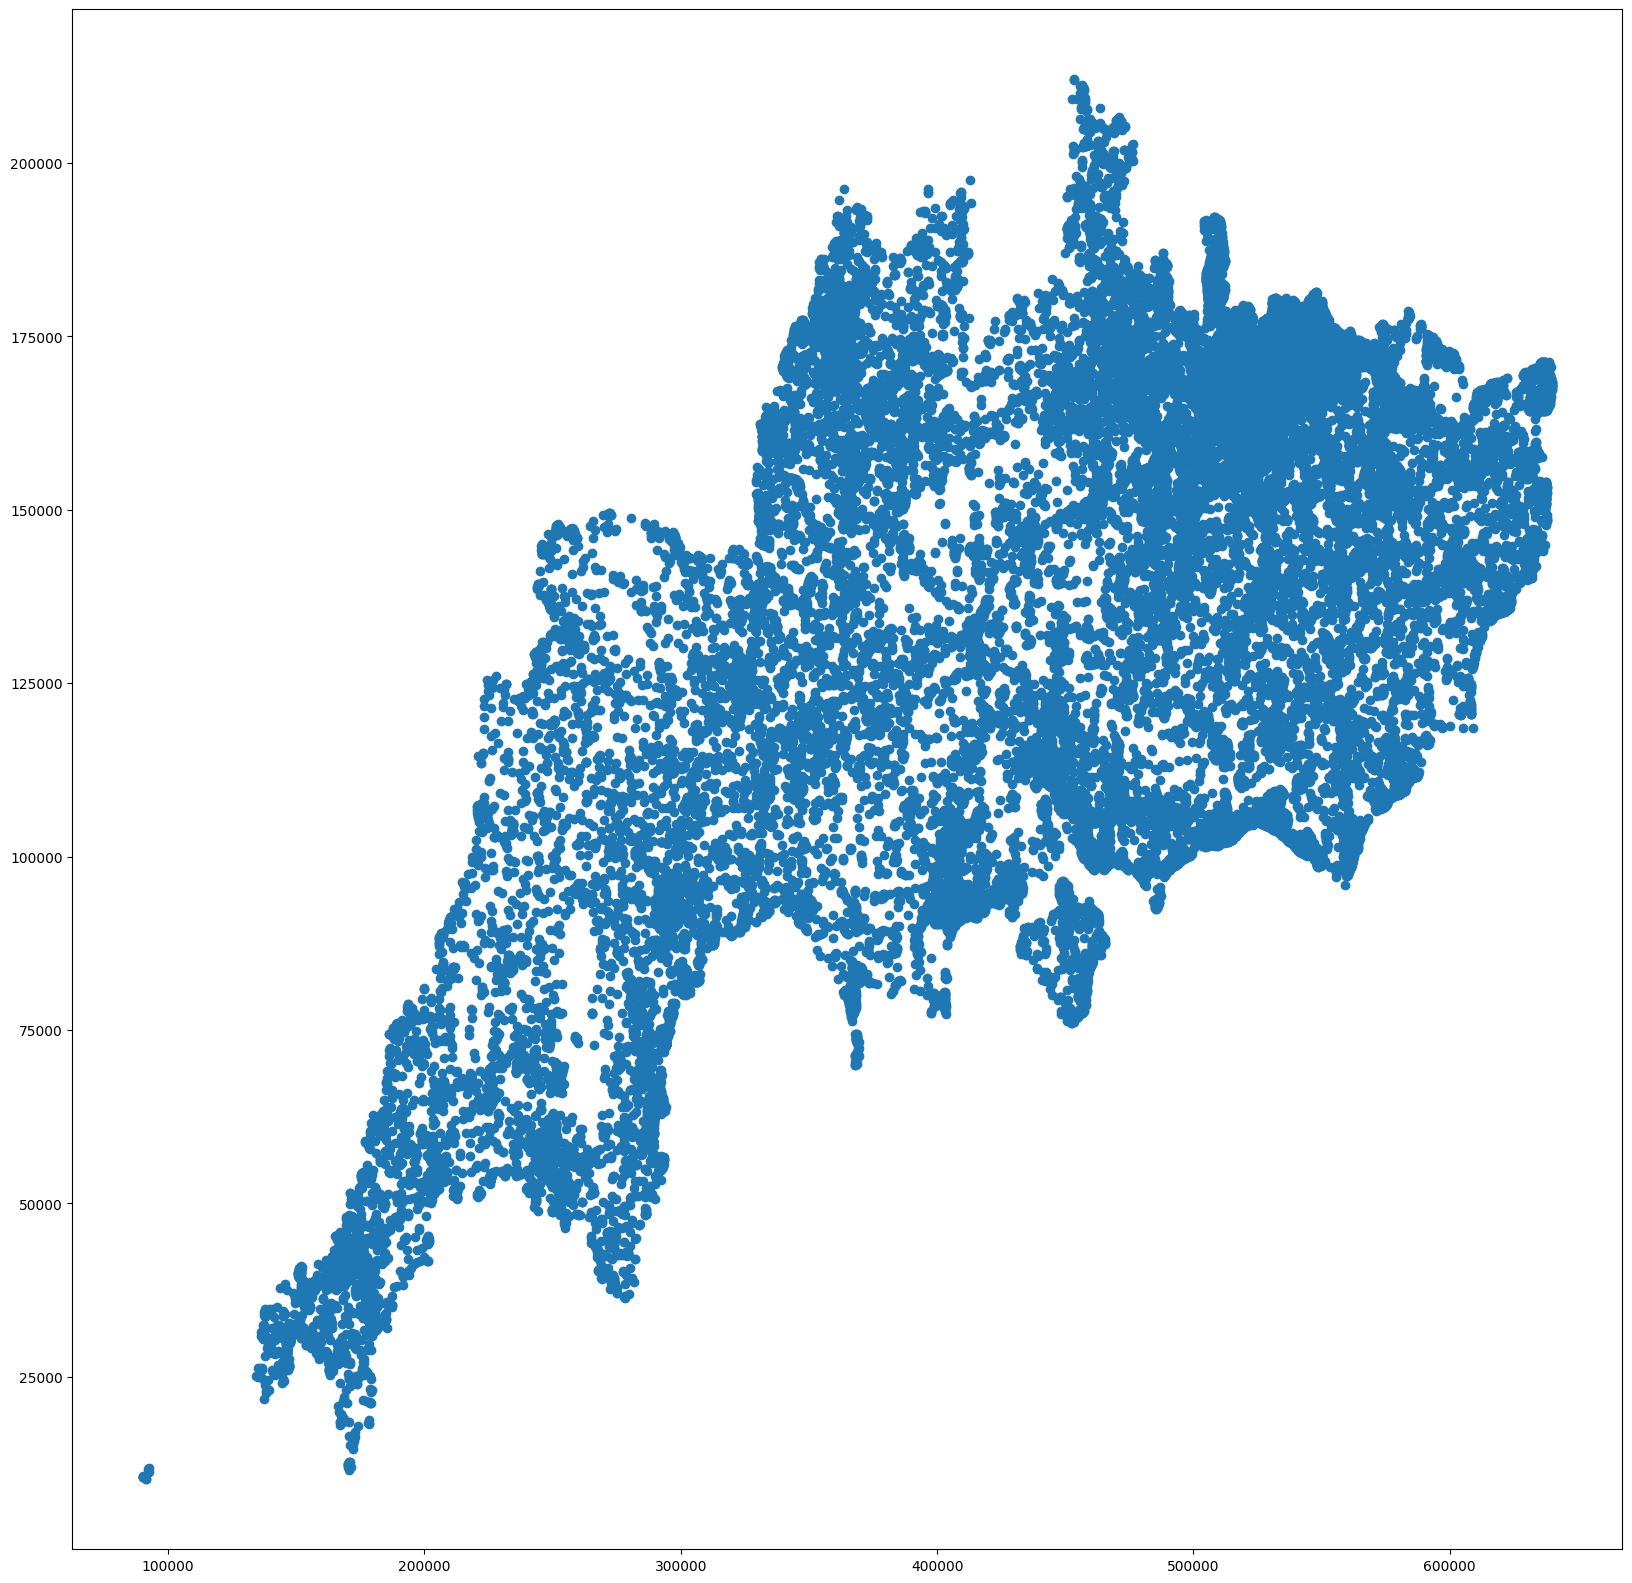

In [19]:
fig, ax = plt.subplots(1,1, figsize=(20,20))

ax.scatter(df.easting, df.northing)

## Geographical Splitting

In [28]:
# Calculate the median of easting and northing
easting_median = df['easting'].median()
northing_median = df['northing'].median()

# Divide the data into four regions based on the median
def assign_region(row):
    if row['easting'] <= easting_median and row['northing'] <= northing_median:
        return "SW"  # Southwest
    elif row['easting'] <= easting_median and row['northing'] > northing_median:
        return "NW"  # Northwest
    elif row['easting'] > easting_median and row['northing'] <= northing_median:
        return "SE"  # Southeast
    else:
        return "NE"  # Northeast

df['region'] = df.apply(assign_region, axis=1)

df

postcode  easting  northing          soilType  elevation  \
0      BA1 1AL   374813    164571  Unsurveyed/Urban         20   
1      BA1 1AN   375116    164500  Unsurveyed/Urban         20   
2      BA1 1AR   375091    164454  Unsurveyed/Urban         20   
3      BA1 1BG   375060    164969  Unsurveyed/Urban         30   
4      BA1 1BH   375021    164930  Unsurveyed/Urban         30   
...        ...      ...       ...               ...        ...   
79994   W6 0SB   521913    178731  Unsurveyed/Urban         10   
79995   W6 0XA   521911    178821  Unsurveyed/Urban         10   
79996   W6 0XY   521796    179018  Unsurveyed/Urban         10   
79997   W6 0YE   521930    178998  Unsurveyed/Urban         10   
79998  WD3 1PZ   507392    191779         Planosols        100   

      nearestWatercourse  distanceToWatercourse                localAuthority  \
0             River Avon                 1240.0  Bath and North East Somerset   
1             River Avon                 1550.0  Bath and North East Somerset   
2             River Avon                 1540.0  Bath and North East Somerset   
3             River Avon                 1450.0  Bath and North East Somerset   
4             River Avon                 1410.0  Bath and North East Somerset   
...                  ...                    ...                           ...   
79994       River Thames                 1710.0                      Hounslow   
79995       River Thames                 1790.0                      Hounslow   
79996       River Thames                 2020.0                      Hounslow   
79997       River Thames                 1940.0                      Hounslow   
79998                NaN                 1790.0                    Hillingdon   

       riskLabel  medianPrice  historicallyFlooded  households  \
0              5     621800.0                    1      1072.0   
1              3     577900.0                    0      1072.0   
2              5     533300.0                    1      1072.0   
3              1     563600.0                    0      1072.0   
4              1     570800.0                    0      1072.0   
...          ...          ...                  ...         ...   
79994          4     465400.0                    0      5682.0   
79995          4     623000.0                    0      5682.0   
79996          4    2491200.0                    0      5682.0   
79997          4    2469300.0                    0      5682.0   
79998          1     654400.0                    0      2209.0   

       numberOfPostcodeUnits  headcount  catsPerHousehold  dogsPerHousehold  \
0                      354.0     1987.0          0.407479          0.467305   
1                      354.0     1987.0          0.407479          0.467305   
2                      354.0     1987.0          0.407479          0.467305   
3                      354.0     1987.0          0.407479          0.467305   
4                      354.0     1987.0          0.407479          0.467305   
...                      ...        ...               ...               ...   
79994                  396.0    12635.0          0.206226          0.236504   
79995                  396.0    12635.0          0.206226          0.236504   
79996                  396.0    12635.0          0.206226          0.236504   
79997                  396.0    12635.0          0.206226          0.236504   
79998                  314.0     4469.0          0.338028          0.387658   

       households_ave price_category region  
0            3.028249           high     NW  
1            3.028249           high     NW  
2            3.028249    medium_high     NW  
3            3.028249           high     NW  
4            3.028249           high     NW  
...               ...            ...    ...  
79994       14.348485    medium_high     NE  
79995       14.348485           high     NE  
79996       14.348485           high     NE  
79997       14.348485           high  

In [29]:
print(df['region'].value_counts(normalize=True))

region
SW    0.346595
NE    0.346595
NW    0.153405
SE    0.153405
Name: proportion, dtype: float64


Here is the percentage of each region, we then choose one region as the test dataset.

In [30]:


def split_train_test(data, test_regions):
    """
    Split the data into training and testing sets based on the regions
    
    parameters:
    - data: DataFrame, original data
    - test_regions: list, as the name of test regions
    
    output:
    - train_set: DataFrame
    - test_set: DataFrame
    """
    # select the data in the test regions
    test_set = data[data['region'].isin(test_regions)].drop(columns=['region'])
    # select the data not in the test regions
    train_set = data[~data['region'].isin(test_regions)].drop(columns=['region'])
    return train_set, test_set


# Split the data into training and testing sets
test_regions = ["SE", "NW"]
train_set_geo, test_set_geo = split_train_test(df, test_regions=test_regions)

In [31]:
train_set_geo.dropna(subset=['medianPrice'], inplace=True)
test_set_geo.dropna(subset=['medianPrice'], inplace=True)

train_set_geo['medianPrice'].isnull().sum()

np.int64(0)

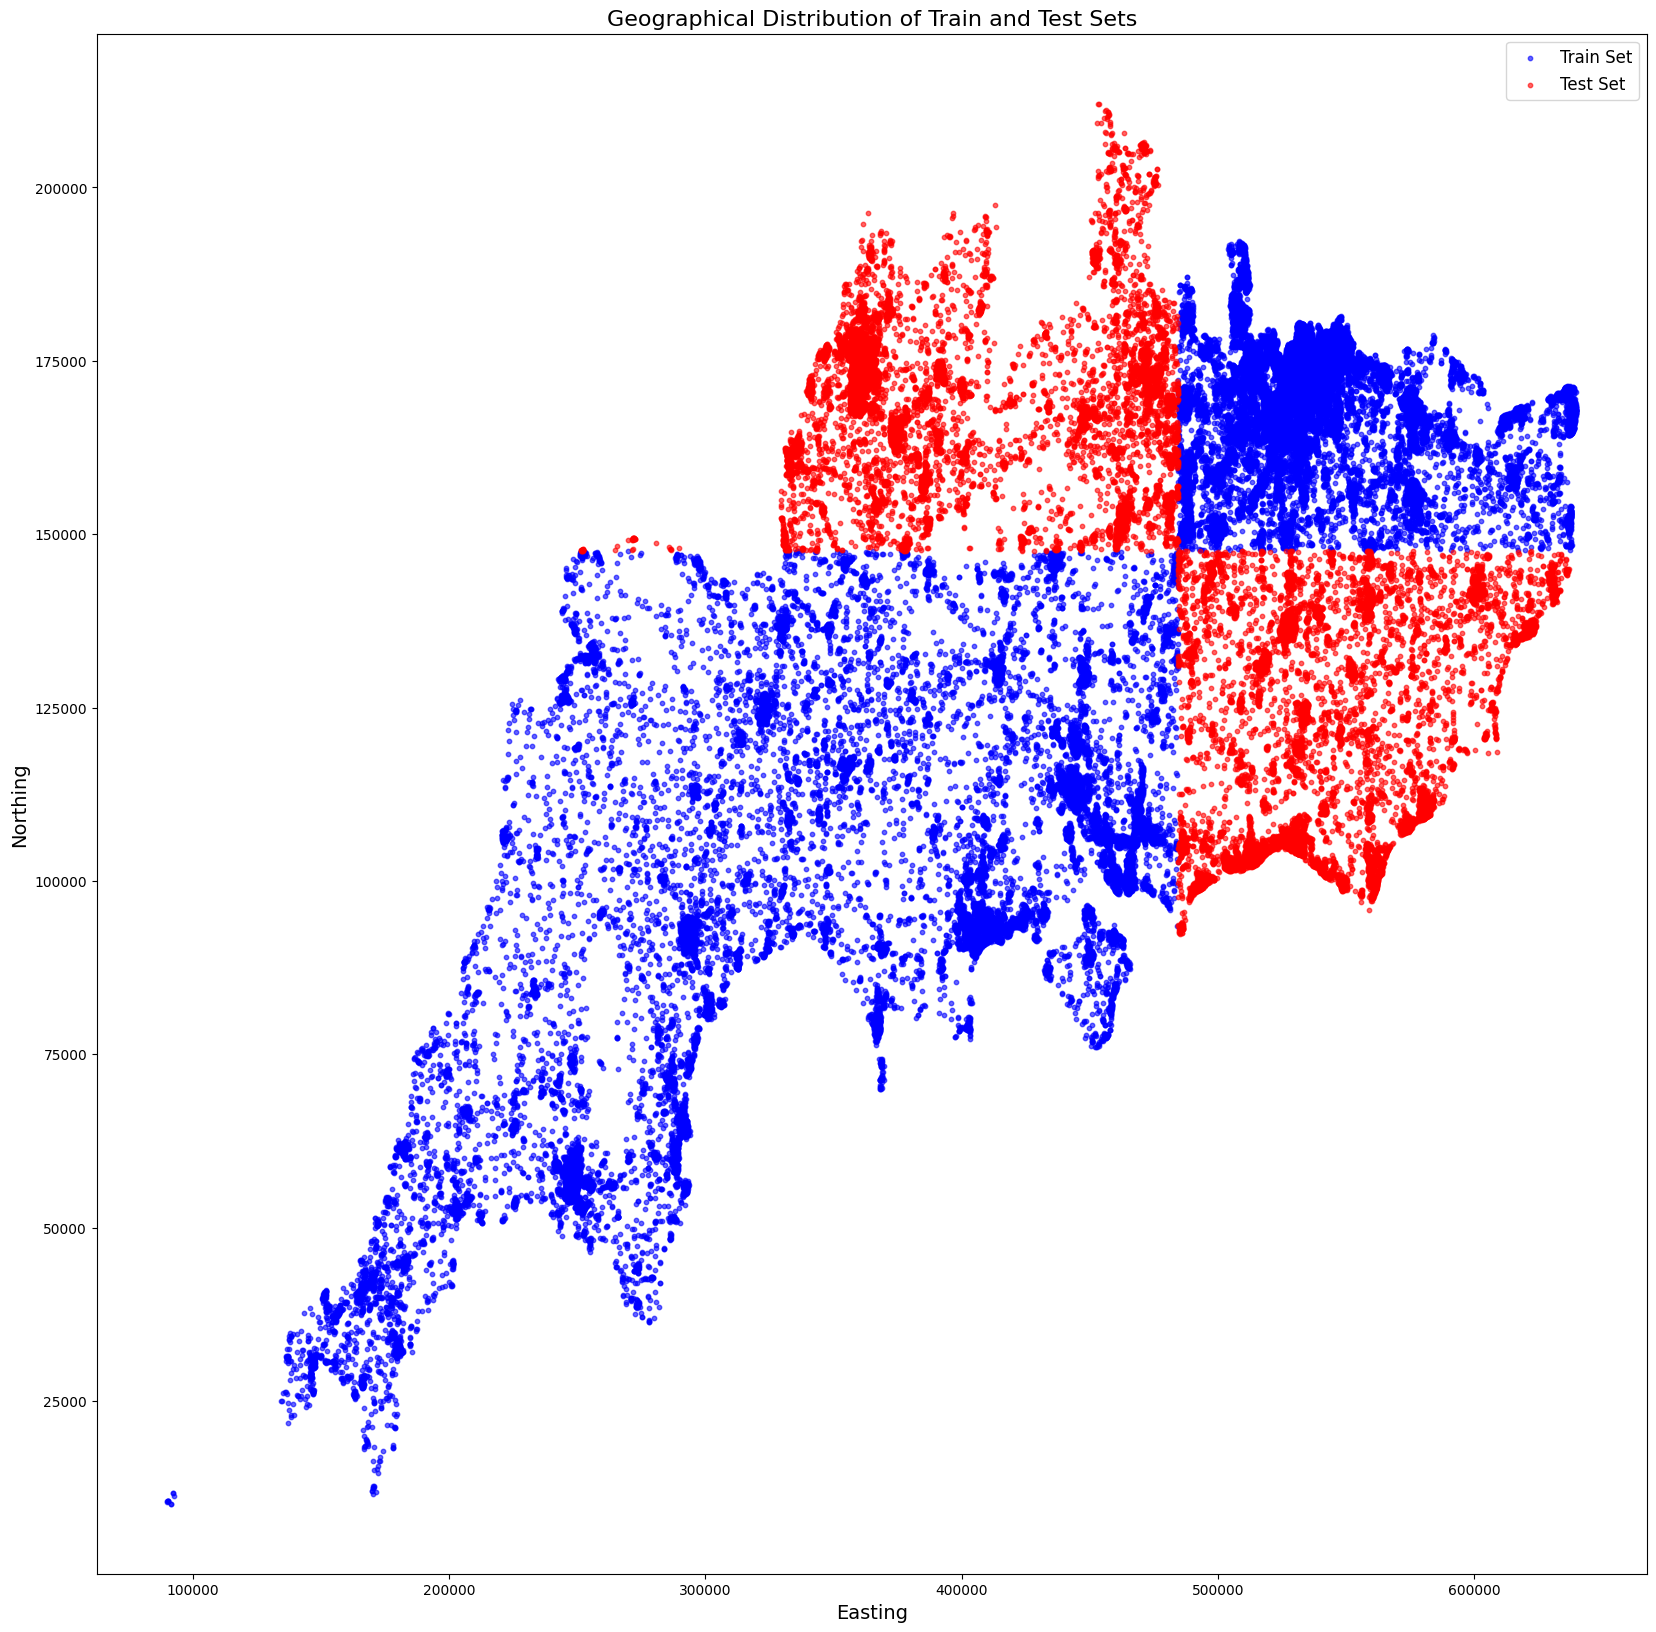

In [32]:


# Plot the geographical distribution of the train and test sets
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# plot the train set (blue points)
ax.scatter(train_set_geo['easting'], train_set_geo['northing'], color='blue', label='Train Set', alpha=0.6, s=10)

# plot the test set (red points)
ax.scatter(test_set_geo['easting'], test_set_geo['northing'], color='red', label='Test Set', alpha=0.6, s=10)

# set the title and labels
ax.set_title("Geographical Distribution of Train and Test Sets", fontsize=16)
ax.set_xlabel("Easting", fontsize=14)
ax.set_ylabel("Northing", fontsize=14)

# add the legend
ax.legend(fontsize=12)

# show the plot
plt.show()

In [ ]:
# create training set
X_train= train_set_geo.drop(columns=['medianPrice'])
y_train= train_set_geo['medianPrice']

# create test set
X_test= test_set_geo.drop(columns=['medianPrice'])
y_test= test_set_geo['medianPrice']

## Random Splitting

In [16]:

y = df['medianPrice'] # target
X = df.drop(columns=['medianPrice']) # features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

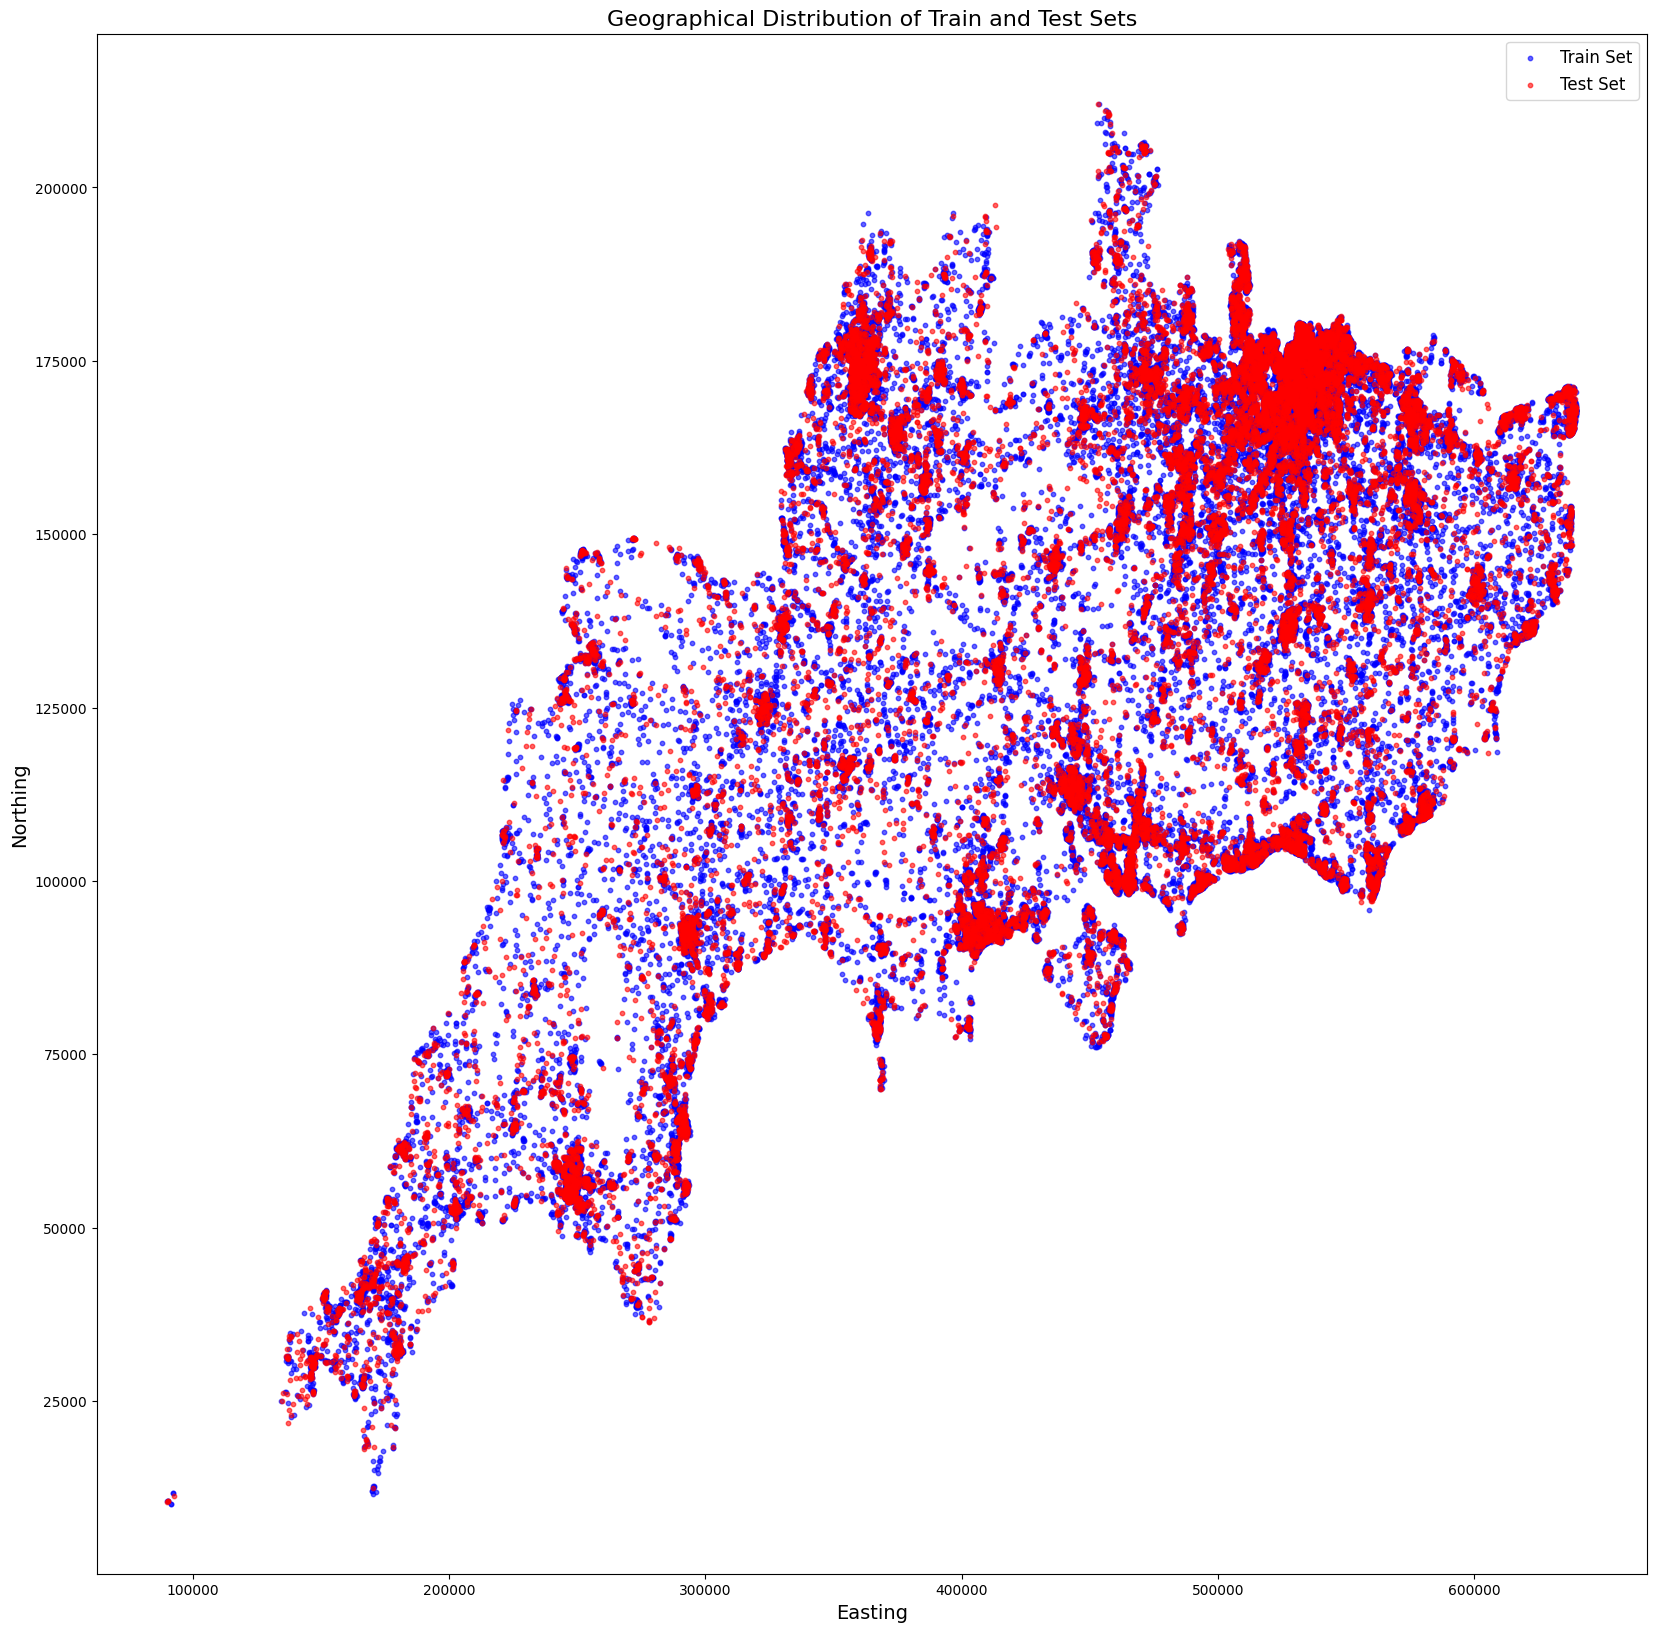

In [69]:


# Plot the geographical distribution of the train and test sets
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# plot the train set (blue points)
ax.scatter(X_train['easting'], X_train['northing'], color='blue', label='Train Set', alpha=0.6, s=10)

# plot the test set (red points)
ax.scatter(X_test['easting'], X_test['northing'], color='red', label='Test Set', alpha=0.6, s=10)

# set the title and labels
ax.set_title("Geographical Distribution of Train and Test Sets", fontsize=16)
ax.set_xlabel("Easting", fontsize=14)
ax.set_ylabel("Northing", fontsize=14)

# add the legend
ax.legend(fontsize=12)

# show the plot
plt.show()

## Log && bin splitting

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
import numpy as np

df['log_medianPrice'] = np.log1p(df['medianPrice'])

In [18]:
df.describe()

easting       northing     elevation  distanceToWatercourse  \
count   73798.000000   73798.000000  73798.000000            73798.00000   
mean   450526.585300  136040.230602     53.957153             1512.33299   
std    111682.189863   38973.019504     43.903206             1493.30102   
min     90098.000000   10216.000000    -10.000000                0.00000   
25%    368078.250000  105841.500000     20.000000              630.00000   
50%    484427.000000  147593.500000     40.000000             1100.00000   
75%    532036.000000  169334.000000     80.000000             1870.00000   
max    639867.000000  212063.000000    430.000000            47470.00000   

          riskLabel   medianPrice  historicallyFlooded    households  \
count  73798.000000  7.379800e+04         73798.000000  73609.000000   
mean       1.684978  5.141523e+05             0.029594   3434.557459   
std        1.213010  9.093642e+05             0.169466   1374.476166   
min        1.000000  1.000000e+02             0.000000    105.000000   
25%        1.000000  2.924000e+05             0.000000   2410.000000   
50%        1.000000  3.984000e+05             0.000000   3396.000000   
75%        2.000000  5.649750e+05             0.000000   4345.000000   
max        7.000000  6.540120e+07             1.000000   9704.000000   

       numberOfPostcodeUnits     headcount  catsPerHousehold  \
count           73609.000000  73609.000000      73798.000000   
mean              293.732832   8437.447527          0.472429   
std                66.375181   3641.852330          0.331850   
min                18.000000    173.000000          0.030856   
25%               252.000000   5727.000000          0.239429   
50%               301.000000   8143.000000          0.384864   
75%               345.000000  10716.000000          0.624204   
max               398.000000  25634.000000          4.982600   

       dogsPerHousehold  households_ave  log_medianPrice  
count      73798.000000    73609.000000     73798.000000  
mean           0.541791       11.636076        12.936545  
std            0.380572        3.770209         0.579306  
min            0.035386        0.662722         4.615121  
25%            0.274582        8.920213        12.585881  
50%            0.441371       11.440789        12.895214  
75%            0.715850       14.061489        13.244539  
max            5.714151       30.515723        17.996051

In [19]:
# 1. 创建分层区间（bins）
bins = [0, 12.5, 12.9, 13.2,16,float('inf')]  # 定义区间
labels = ['low', 'medium_low', 'medium_high', 'high','very high']  # 区间标签

# 2. 使用 pd.cut 对 log_medianPrice 分层
df['price_category'] = pd.cut(df['log_medianPrice'], bins=bins, labels=labels)

# 检查每个类别的样本分布
print(df['price_category'].value_counts())

price_category
medium_low     22914
high           20327
medium_high    16232
low            14276
very high         49
Name: count, dtype: int64


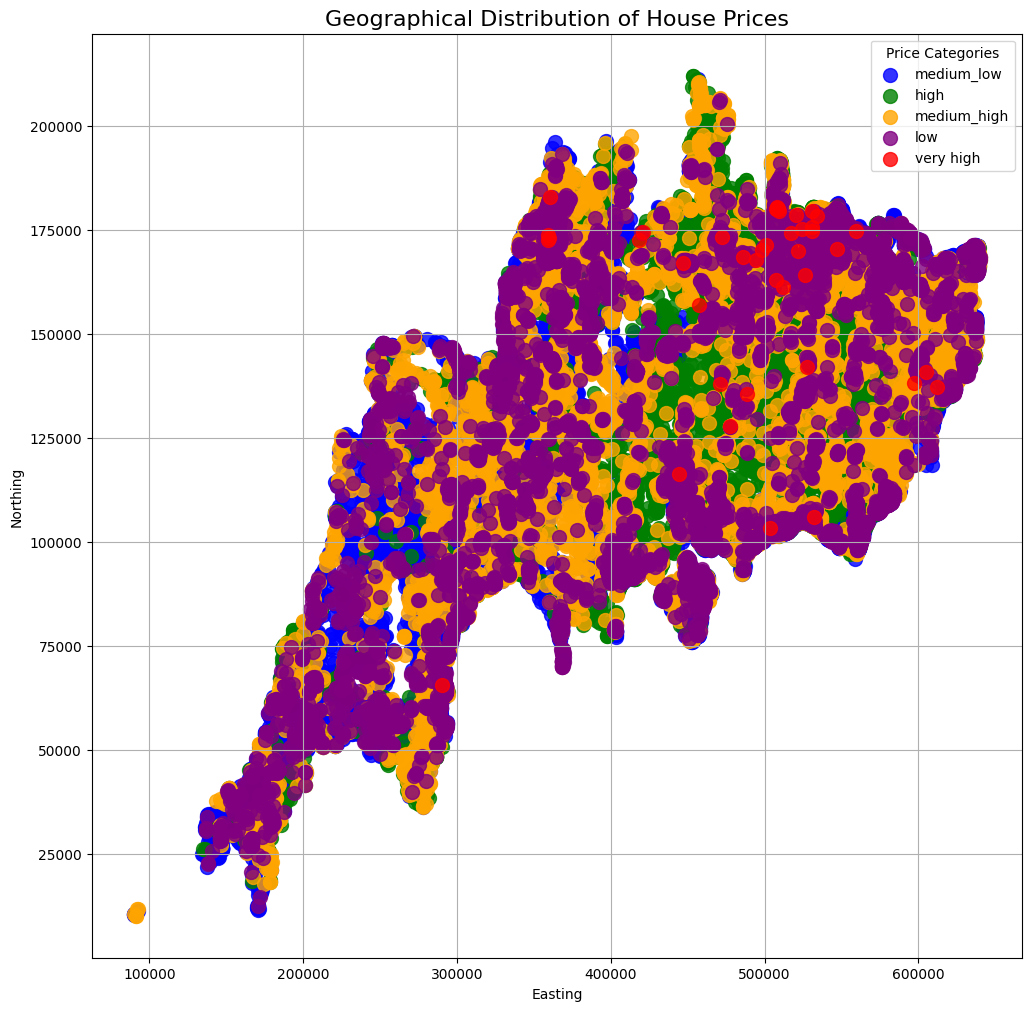

In [20]:
# 定义每个房价标签的颜色
color_map = {
    'medium_low': 'blue',
    'high': 'green',
    'medium_high': 'orange',
    'low': 'purple',
    'very high': 'red'
}

# 创建图表
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 为每个房价标签绘制散点
for category, color in color_map.items():
    subset = df[df['price_category'] == category]
    ax.scatter(subset['easting'], subset['northing'], label=category, color=color, alpha=0.8, s=100)

# 添加标题、图例和标签
ax.set_title("Geographical Distribution of House Prices", fontsize=16)
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
ax.legend(title="Price Categories", loc="upper right")
plt.grid(True)

# 显示图表
plt.show()

In [21]:

df.drop(columns=['log_medianPrice'], inplace=True)


# 3. 分层抽样划分数据集
train_data, test_data = train_test_split(
    df,
    test_size=0.2,                       # 测试集占 20%
    stratify=df['price_category'],       # 按照 price_category 分层
    random_state=42                      # 固定随机种子
)



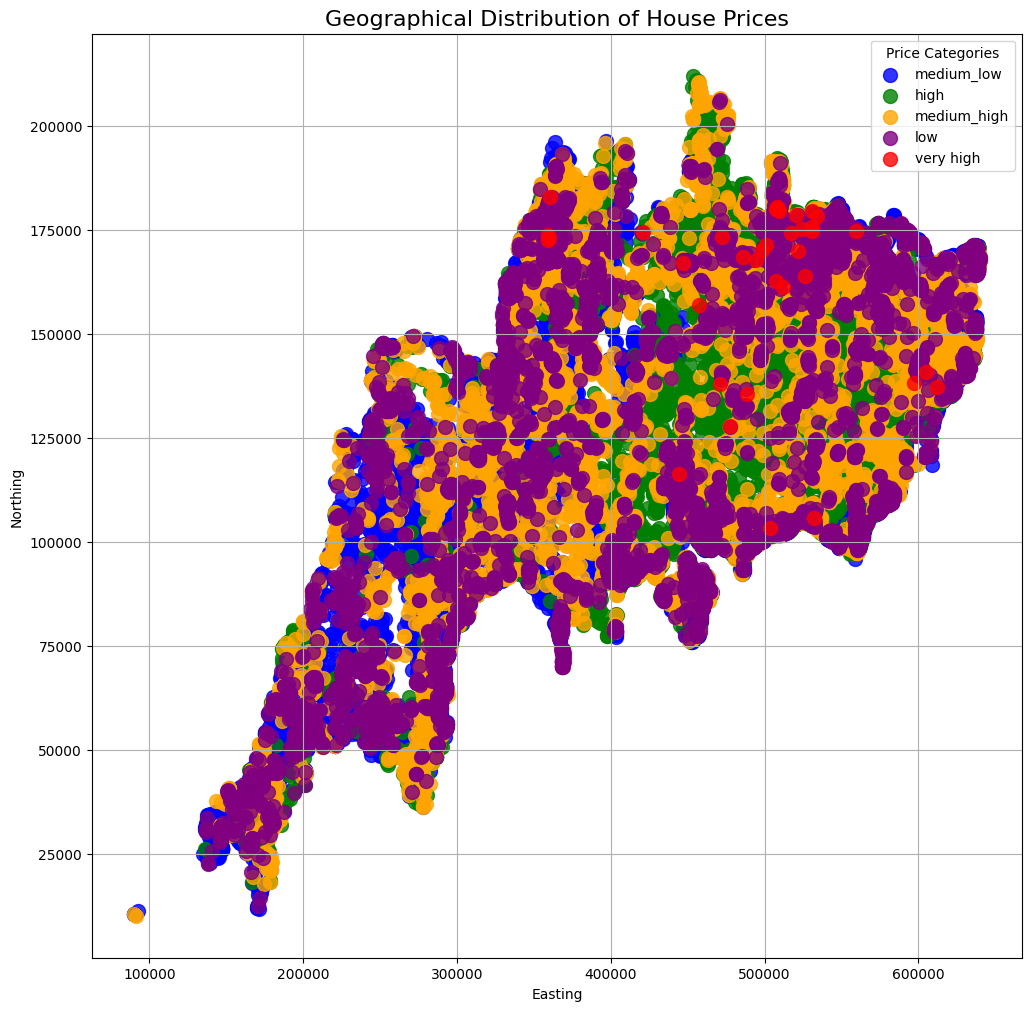

In [22]:
# 定义每个房价标签的颜色
color_map = {
    'medium_low': 'blue',
    'high': 'green',
    'medium_high': 'orange',
    'low': 'purple',
    'very high': 'red'
}

# 创建图表
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 为每个房价标签绘制散点
for category, color in color_map.items():
    subset = train_data[train_data['price_category'] == category]
    ax.scatter(subset['easting'], subset['northing'], label=category, color=color, alpha=0.8, s=100)

# 添加标题、图例和标签
ax.set_title("Geographical Distribution of House Prices", fontsize=16)
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
ax.legend(title="Price Categories", loc="upper right")
plt.grid(True)

# 显示图表
plt.show()

In [23]:
# 4. 移除辅助列
train_data = train_data.drop(columns=['price_category'])
test_data = test_data.drop(columns=['price_category'])

In [24]:
train_data

postcode  easting  northing          soilType  elevation  \
34635  ME14 4PQ   579661    156133          Luvisols         60   
31378   KT1 3RQ   519637    169533  Unsurveyed/Urban         20   
4114   BH22 9DQ   408763    101621          Gleysols         20   
78487   TW4 5RB   512877    174520  Unsurveyed/Urban         20   
3132   BH15 1JL   400820     90463  Unsurveyed/Urban         10   
...         ...      ...       ...               ...        ...   
31205   HA6 1PW   510385    190365  Unsurveyed/Urban         70   
31172   HA5 2SW   511100    188500  Unsurveyed/Urban         60   
44297   PO7 6SJ   466417    111335        Stagnosols         40   
79109  UB10 0YF   506233    183941  Unsurveyed/Urban         50   
29118  GU27 1AJ   490365    134626           Podsols        190   

      nearestWatercourse  distanceToWatercourse  \
34635                NaN                  980.0   
31378     Hogsmill River                 1280.0   
4114                 NaN                  310.0   
78487        River Crane                 1850.0   
3132      Little Channel                   40.0   
...                  ...                    ...   
31205         River Pinn                 1470.0   
31172      Yeading Brook                 1510.0   
44297                NaN                  640.0   
79109         River Pinn                  560.0   
29118                NaN                 1050.0   

                            localAuthority  riskLabel  medianPrice  \
34635                            Maidstone          2     267200.0   
31378                 Kingston upon Thames          2     533800.0   
4114                                Dorset          5     358600.0   
78487                             Hounslow          1     440300.0   
3132   Bournemouth, Christchurch and Poole          4     529800.0   
...                                    ...        ...          ...   
31205                           Hillingdon          1     630800.0   
31172                           Hillingdon          1     630100.0   
44297                           Winchester          3     351700.0   
79109                           Hillingdon          2     485300.0   
29118                             Waverley          1     742600.0   

       historicallyFlooded  households  numberOfPostcodeUnits  headcount  \
34635                    0      2609.0                  228.0     6007.0   
31378                    0      4719.0                  301.0    11641.0   
4114                     0      4219.0                  348.0     9482.0   
78487                    0      3510.0                  235.0    11559.0   
3132                     0      3544.0                  345.0     6505.0   
...                    ...         ...                    ...        ...   
31205                    0      3733.0                  285.0     8803.0   
31172                    0      3787.0                  299.0     9254.0   
44297                    0      4392.0                  349.0    10041.0   
79109                    0      4299.0                  371.0    14576.0   
29118                    0      2960.0                  264.0     7083.0   

       catsPerHousehold  dogsPerHousehold  households_ave  
34635          0.699623          0.802343       11.442982  
31378          0.220905          0.253338       15.677741  
4114           0.337989          0.387612       12.123563  
78487          0.116824          0.133977       14.936170  
3132           0.245938          0.282047       10.272464  
...                 ...               ...             ...  
31205          0.355947          0.408207       13.098246  
31172          0.382260          0.438384       12.665552  
44297          0.322630          0.369999       12.584527  
79109          0.222193          0.254816       11.587601  
29118          0.535445          0.614060       11.212121  

[59038 rows x 17 columns]

In [25]:
# create training set
X_train= train_data.drop(columns=['medianPrice'])
y_train= train_data['medianPrice']

# create test set
X_test= test_data.drop(columns=['medianPrice'])
y_test= test_data['medianPrice']

In [26]:
X_train.head()

postcode  easting  northing          soilType  elevation  \
34635  ME14 4PQ   579661    156133          Luvisols         60   
31378   KT1 3RQ   519637    169533  Unsurveyed/Urban         20   
4114   BH22 9DQ   408763    101621          Gleysols         20   
78487   TW4 5RB   512877    174520  Unsurveyed/Urban         20   
3132   BH15 1JL   400820     90463  Unsurveyed/Urban         10   

      nearestWatercourse  distanceToWatercourse  \
34635                NaN                  980.0   
31378     Hogsmill River                 1280.0   
4114                 NaN                  310.0   
78487        River Crane                 1850.0   
3132      Little Channel                   40.0   

                            localAuthority  riskLabel  historicallyFlooded  \
34635                            Maidstone          2                    0   
31378                 Kingston upon Thames          2                    0   
4114                                Dorset          5                    0   
78487                             Hounslow          1                    0   
3132   Bournemouth, Christchurch and Poole          4                    0   

       households  numberOfPostcodeUnits  headcount  catsPerHousehold  \
34635      2609.0                  228.0     6007.0          0.699623   
31378      4719.0                  301.0    11641.0          0.220905   
4114       4219.0                  348.0     9482.0          0.337989   
78487      3510.0                  235.0    11559.0          0.116824   
3132       3544.0                  345.0     6505.0          0.245938   

       dogsPerHousehold  households_ave  
34635          0.802343       11.442982  
31378          0.253338       15.677741  
4114           0.387612       12.123563  
78487          0.133977       14.936170  
3132           0.282047       10.272464

# EDA

In [45]:
X_train

postcode  easting  northing          soilType  elevation  \
34635  ME14 4PQ   579661    156133          Luvisols         60   
31378   KT1 3RQ   519637    169533  Unsurveyed/Urban         20   
4114   BH22 9DQ   408763    101621          Gleysols         20   
78487   TW4 5RB   512877    174520  Unsurveyed/Urban         20   
3132   BH15 1JL   400820     90463  Unsurveyed/Urban         10   
...         ...      ...       ...               ...        ...   
31205   HA6 1PW   510385    190365  Unsurveyed/Urban         70   
31172   HA5 2SW   511100    188500  Unsurveyed/Urban         60   
44297   PO7 6SJ   466417    111335        Stagnosols         40   
79109  UB10 0YF   506233    183941  Unsurveyed/Urban         50   
29118  GU27 1AJ   490365    134626           Podsols        190   

      nearestWatercourse  distanceToWatercourse  \
34635                NaN                  980.0   
31378     Hogsmill River                 1280.0   
4114                 NaN                  310.0   
78487        River Crane                 1850.0   
3132      Little Channel                   40.0   
...                  ...                    ...   
31205         River Pinn                 1470.0   
31172      Yeading Brook                 1510.0   
44297                NaN                  640.0   
79109         River Pinn                  560.0   
29118                NaN                 1050.0   

                            localAuthority  riskLabel  historicallyFlooded  \
34635                            Maidstone          2                    0   
31378                 Kingston upon Thames          2                    0   
4114                                Dorset          5                    0   
78487                             Hounslow          1                    0   
3132   Bournemouth, Christchurch and Poole          4                    0   
...                                    ...        ...                  ...   
31205                           Hillingdon          1                    0   
31172                           Hillingdon          1                    0   
44297                           Winchester          3                    0   
79109                           Hillingdon          2                    0   
29118                             Waverley          1                    0   

       households  numberOfPostcodeUnits  headcount  catsPerHousehold  \
34635      2609.0                  228.0     6007.0          0.699623   
31378      4719.0                  301.0    11641.0          0.220905   
4114       4219.0                  348.0     9482.0          0.337989   
78487      3510.0                  235.0    11559.0          0.116824   
3132       3544.0                  345.0     6505.0          0.245938   
...           ...                    ...        ...               ...   
31205      3733.0                  285.0     8803.0          0.355947   
31172      3787.0                  299.0     9254.0          0.382260   
44297      4392.0                  349.0    10041.0          0.322630   
79109      4299.0                  371.0    14576.0          0.222193   
29118      2960.0                  264.0     7083.0          0.535445   

       dogsPerHousehold  households_ave  
34635          0.802343       11.442982  
31378          0.253338       15.677741  
4114           0.387612       12.123563  
78487          0.133977       14.936170  
3132           0.282047       10.272464  
...                 ...             ...  
31205          0.408207       13.098246  
31172          0.438384       12.665552  
44297          0.369999       12.584527  
79109          0.254816       11.587601  
29118          0.614060       11.212121  

[59038 rows x 16 columns]

In [46]:
missing = X_train.isnull().sum() / len(X_train)
missing

postcode                 0.000000
easting                  0.000000
northing                 0.000000
soilType                 0.000000
elevation                0.000000
nearestWatercourse       0.372387
distanceToWatercourse    0.000000
localAuthority           0.000000
riskLabel                0.000000
historicallyFlooded      0.000000
households               0.002659
numberOfPostcodeUnits    0.002659
headcount                0.002659
catsPerHousehold         0.000000
dogsPerHousehold         0.000000
households_ave           0.002659
dtype: float64

Due to the excessive missing values of 'nearestWatercourse'(37.5%), so dropping this feature.

In [47]:
xy_train = pd.concat([X_train, y_train], axis=1)

xy_train.drop(columns=['postcode','nearestWatercourse','riskLabel','historicallyFlooded'],inplace=True)

xy_train

easting  northing          soilType  elevation  distanceToWatercourse  \
34635   579661    156133          Luvisols         60                  980.0   
31378   519637    169533  Unsurveyed/Urban         20                 1280.0   
4114    408763    101621          Gleysols         20                  310.0   
78487   512877    174520  Unsurveyed/Urban         20                 1850.0   
3132    400820     90463  Unsurveyed/Urban         10                   40.0   
...        ...       ...               ...        ...                    ...   
31205   510385    190365  Unsurveyed/Urban         70                 1470.0   
31172   511100    188500  Unsurveyed/Urban         60                 1510.0   
44297   466417    111335        Stagnosols         40                  640.0   
79109   506233    183941  Unsurveyed/Urban         50                  560.0   
29118   490365    134626           Podsols        190                 1050.0   

                            localAuthority  households  numberOfPostcodeUnits  \
34635                            Maidstone      2609.0                  228.0   
31378                 Kingston upon Thames      4719.0                  301.0   
4114                                Dorset      4219.0                  348.0   
78487                             Hounslow      3510.0                  235.0   
3132   Bournemouth, Christchurch and Poole      3544.0                  345.0   
...                                    ...         ...                    ...   
31205                           Hillingdon      3733.0                  285.0   
31172                           Hillingdon      3787.0                  299.0   
44297                           Winchester      4392.0                  349.0   
79109                           Hillingdon      4299.0                  371.0   
29118                             Waverley      2960.0                  264.0   

       headcount  catsPerHousehold  dogsPerHousehold  households_ave  \
34635     6007.0          0.699623          0.802343       11.442982   
31378    11641.0          0.220905          0.253338       15.677741   
4114      9482.0          0.337989          0.387612       12.123563   
78487    11559.0          0.116824          0.133977       14.936170   
3132      6505.0          0.245938          0.282047       10.272464   
...          ...               ...               ...             ...   
31205     8803.0          0.355947          0.408207       13.098246   
31172     9254.0          0.382260          0.438384       12.665552   
44297    10041.0          0.322630          0.369999       12.584527   
79109    14576.0          0.222193          0.254816       11.587601   
29118     7083.0          0.535445          0.614060       11.212121   

       medianPrice  
34635     267200.0  
31378     533800.0  
4114      358600.0  
78487     440300.0  
3132      529800.0  
...            ...  
31205     630800.0  
31172     630100.0  
44297     351700.0  
79109     485300.0  
29118     742600.0  

[59038 rows x 13 columns]

In [48]:
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the Season and Wind_Dir_Category columns
xy_train['soilType'] = label_encoder.fit_transform(xy_train['soilType'])
xy_train['localAuthority'] = label_encoder.fit_transform(xy_train['localAuthority'])

# Show the xy_train DataFrame
xy_train

easting  northing  soilType  elevation  distanceToWatercourse  \
34635   579661    156133         5         60                  980.0   
31378   519637    169533         9         20                 1280.0   
4114    408763    101621         2         20                  310.0   
78487   512877    174520         9         20                 1850.0   
3132    400820     90463         9         10                   40.0   
...        ...       ...       ...        ...                    ...   
31205   510385    190365         9         70                 1470.0   
31172   511100    188500         9         60                 1510.0   
44297   466417    111335         8         40                  640.0   
79109   506233    183941         9         50                  560.0   
29118   490365    134626         7        190                 1050.0   

       localAuthority  households  numberOfPostcodeUnits  headcount  \
34635              44      2609.0                  228.0     6007.0   
31378              40      4719.0                  301.0    11641.0   
4114               17      4219.0                  348.0     9482.0   
78487              37      3510.0                  235.0    11559.0   
3132                6      3544.0                  345.0     6505.0   
...               ...         ...                    ...        ...   
31205              35      3733.0                  285.0     8803.0   
31172              35      3787.0                  299.0     9254.0   
44297              89      4392.0                  349.0    10041.0   
79109              35      4299.0                  371.0    14576.0   
29118              84      2960.0                  264.0     7083.0   

       catsPerHousehold  dogsPerHousehold  households_ave  medianPrice  
34635          0.699623          0.802343       11.442982     267200.0  
31378          0.220905          0.253338       15.677741     533800.0  
4114           0.337989          0.387612       12.123563     358600.0  
78487          0.116824          0.133977       14.936170     440300.0  
3132           0.245938          0.282047       10.272464     529800.0  
...                 ...               ...             ...          ...  
31205          0.355947          0.408207       13.098246     630800.0  
31172          0.382260          0.438384       12.665552     630100.0  
44297          0.322630          0.369999       12.584527     351700.0  
79109          0.222193          0.254816       11.587601     485300.0  
29118          0.535445          0.614060       11.212121     742600.0  

[59038 rows x 13 columns]

<Axes: >

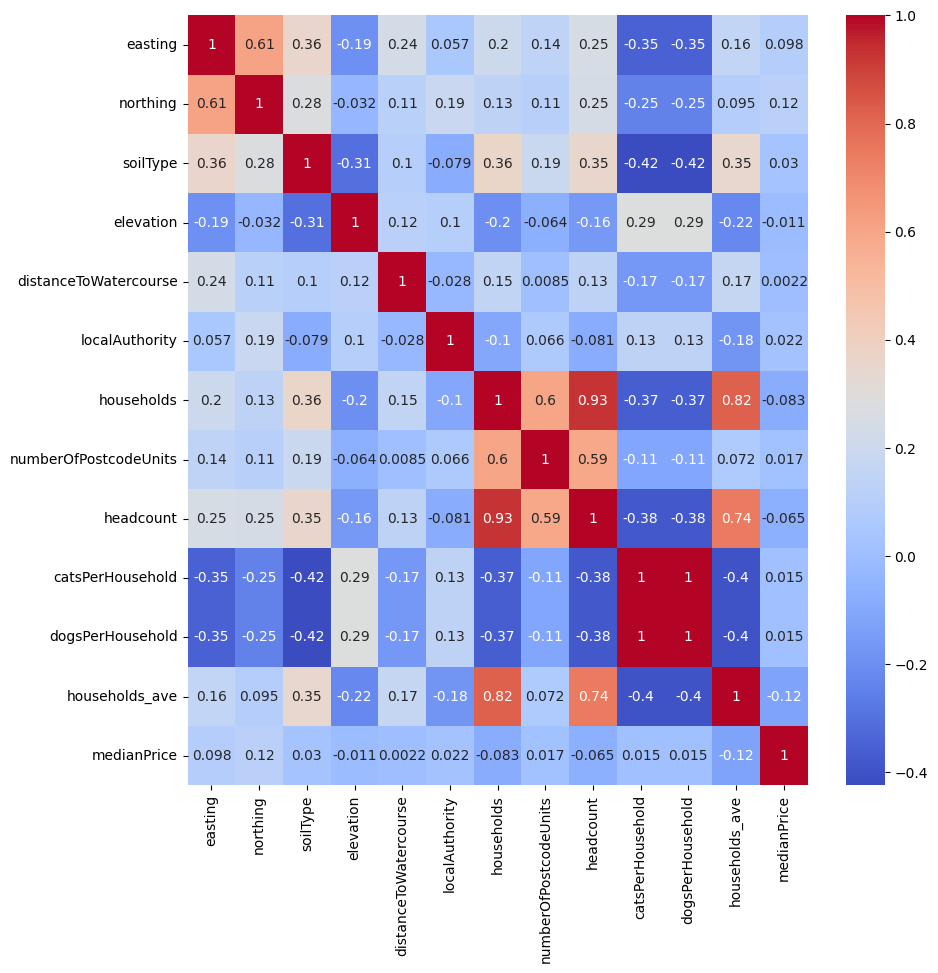

In [49]:
#  Box Plots
import seaborn as sns

# calculate the correlation matrix
correlation = xy_train.corr()

plt.figure(figsize=(10, 10))

# create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')

I try to drop 'headcount' or 'households'

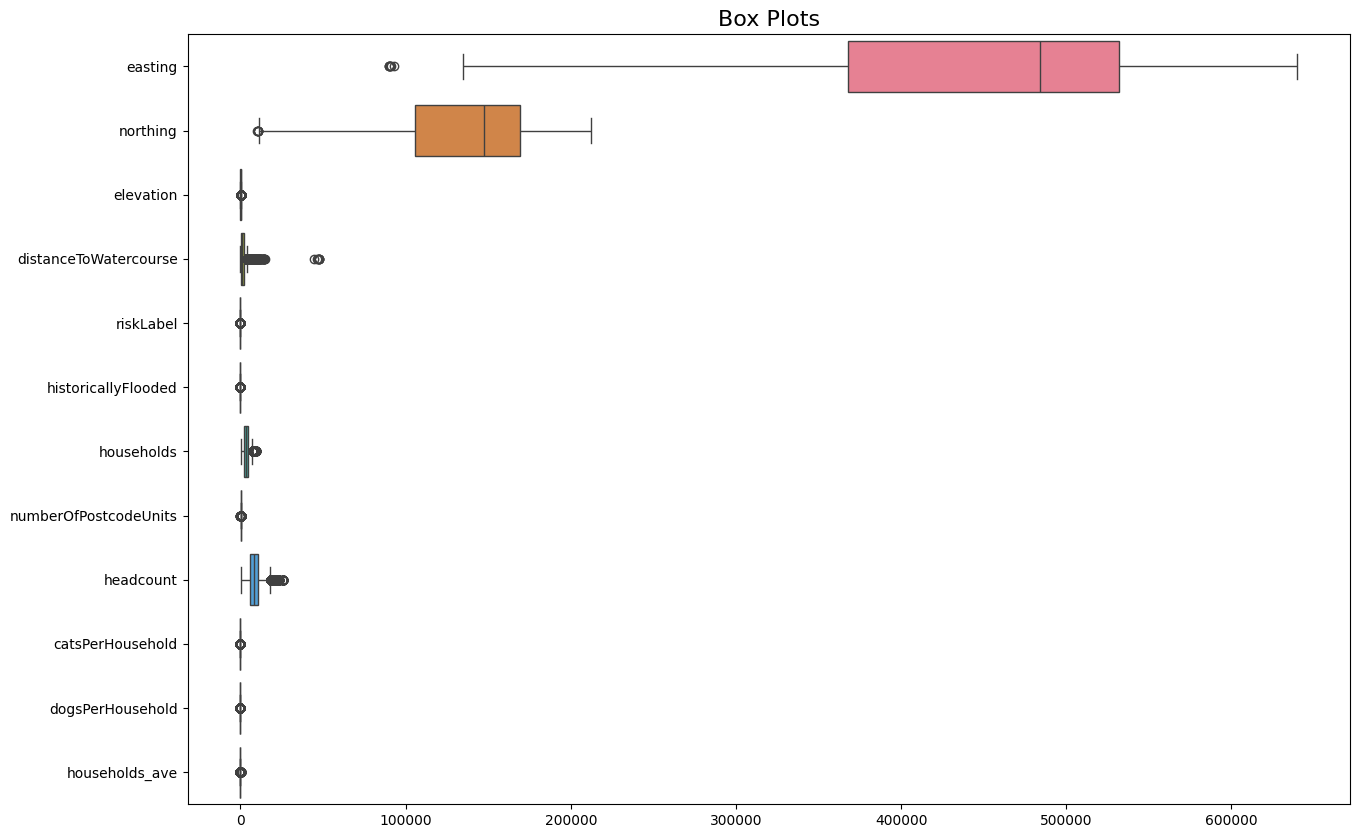

In [50]:
#  Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train, orient='h')
plt.title('Box Plots', fontsize=16)
plt.show()

In [51]:
X_train.describe()

easting       northing     elevation  distanceToWatercourse  \
count   59038.000000   59038.000000  59038.000000           59038.000000   
mean   450279.269504  136014.145330     54.067888            1508.478099   
std    111692.532451   38967.864325     44.002391            1469.425467   
min     90098.000000   10239.000000    -10.000000               0.000000   
25%    367915.500000  105867.250000     20.000000             630.000000   
50%    484046.000000  147630.000000     40.000000            1100.000000   
75%    531932.000000  169300.000000     80.000000            1870.000000   
max    639858.000000  212063.000000    430.000000           47470.000000   

          riskLabel  historicallyFlooded    households  numberOfPostcodeUnits  \
count  59038.000000         59038.000000  58881.000000           58881.000000   
mean       1.683831             0.029388   3433.688966             293.817496   
std        1.214027             0.168893   1378.770994              66.412038   
min        1.000000             0.000000    105.000000              18.000000   
25%        1.000000             0.000000   2409.000000             252.000000   
50%        1.000000             0.000000   3395.000000             301.000000   
75%        2.000000             0.000000   4345.000000             345.000000   
max        7.000000             1.000000   9704.000000             398.000000   

          headcount  catsPerHousehold  dogsPerHousehold  households_ave  
count  58881.000000      59038.000000      59038.000000    58881.000000  
mean    8437.686401          0.473295          0.542785       11.624646  
std     3648.499784          0.331150          0.379770        3.774234  
min      173.000000          0.030856          0.035386        0.662722  
25%     5716.000000          0.239429          0.274582        8.916667  
50%     8143.000000          0.384864          0.441371       11.440433  
75%    10716.000000          0.624204          0.715850       14.059829  
max    25634.000000          4.982600          5.714151       30.515723

array([[<Axes: title={'center': 'easting'}>,
        <Axes: title={'center': 'northing'}>,
        <Axes: title={'center': 'soilType'}>,
        <Axes: title={'center': 'elevation'}>],
       [<Axes: title={'center': 'distanceToWatercourse'}>,
        <Axes: title={'center': 'localAuthority'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'numberOfPostcodeUnits'}>],
       [<Axes: title={'center': 'headcount'}>,
        <Axes: title={'center': 'catsPerHousehold'}>,
        <Axes: title={'center': 'dogsPerHousehold'}>,
        <Axes: title={'center': 'households_ave'}>],
       [<Axes: title={'center': 'medianPrice'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

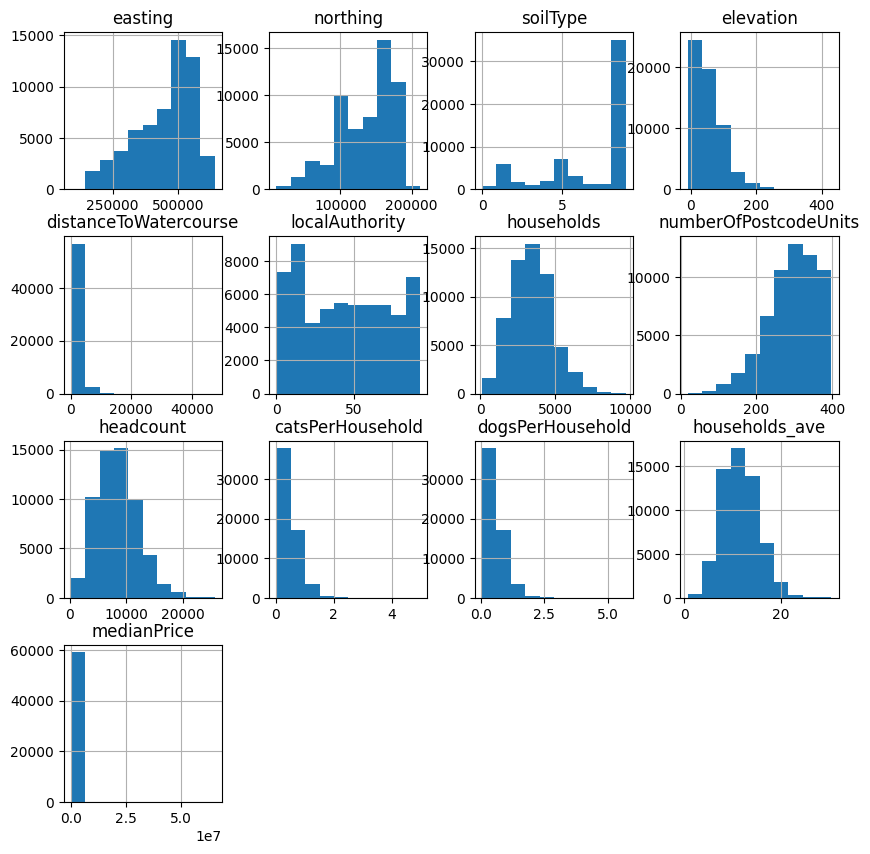

In [52]:
# Display the features distribution
xy_train.hist(figsize=(10,10))

In [53]:
missing1=xy_train.isnull().sum() / len(xy_train)
missing1

easting                  0.000000
northing                 0.000000
soilType                 0.000000
elevation                0.000000
distanceToWatercourse    0.000000
localAuthority           0.000000
households               0.002659
numberOfPostcodeUnits    0.002659
headcount                0.002659
catsPerHousehold         0.000000
dogsPerHousehold         0.000000
households_ave           0.002659
medianPrice              0.000000
dtype: float64

## Pipeline

In [27]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np

set_config(transform_output="pandas")

In [28]:
# Since label coding cannot be used for multiple features in the pipeline, so this step is placed outside.
label_encoder = LabelEncoder()

X_train['soilType']=label_encoder.fit_transform(X_train['soilType'])
X_train['localAuthority']=label_encoder.fit_transform(X_train['localAuthority'])
X_test['soilType']=label_encoder.fit_transform(X_test['soilType'])
X_test['localAuthority']=label_encoder.fit_transform(X_test['localAuthority'])

In [29]:


# Create a feature dropping transformer
feature_drop_pipe = ColumnTransformer(
    transformers=[
        # Drop the Xp, Yp, Depth because they are not useful for the model
        ("drop_features", "drop", ["postcode","nearestWatercourse","riskLabel","historicallyFlooded","headcount"]),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)

# Create an imputer transformer
imputer_pipe=ColumnTransformer(
    transformers=[
        ("num_imputer_mean", SimpleImputer(strategy="mean"), ['households','numberOfPostcodeUnits','households_ave']),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)

# Create a scaler transformer
scaler_pipe = ColumnTransformer(
    transformers=[
        ("standard_scaler", StandardScaler(), [ 'easting','northing','numberOfPostcodeUnits','households','households_ave']),
        ("robust_scaler", RobustScaler(), ['elevation']),
        ('log_transform_scaler', FunctionTransformer(np.log1p, validate=True), ['dogsPerHousehold','catsPerHousehold','distanceToWatercourse']),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)

# Create a preprocessing pipeline
prep_pipe = Pipeline(
    steps=[
        ("feature_dropping", feature_drop_pipe),
        ("imputer", imputer_pipe),
        ("scaler", scaler_pipe)
    ]
)

prep_pipe

Pipeline(steps=[('feature_dropping',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_features', 'drop',
                                                  ['postcode',
                                                   'nearestWatercourse',
                                                   'riskLabel',
                                                   'historicallyFlooded',
                                                   'headcount'])],
                                   verbose_feature_names_out=False)),
                ('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_imputer_mean',
                                                  SimpleImputer(),
                                                  ['households',
                                                   '...
                                   transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['easting', 'northing',
                                                   'numberOfPostcodeUnits',
                                                   'households',
                                                   'households_ave']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['elevation']),
                                                 ('log_transform_scaler',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['dogsPerHousehold',
                                                   'catsPerHousehold',
                                                   'distanceToWatercourse'])],
                                   verbose_feature_names_out=False))])

# Data resampling -- class imbalance

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

In [31]:
X_train_preprocessed = prep_pipe.fit_transform(X_train)
X_test_preprocessed = prep_pipe.transform(X_test)

/opt/homebrew/Caskroom/miniconda/base/envs/deluge/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:303: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))
/opt/homebrew/Caskroom/miniconda/base/envs/deluge/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:303: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))


In [32]:
train_preprocessed=pd.concat([pd.DataFrame(X_train_preprocessed),y_train],axis=1)
train_preprocessed

0         1         2         3         4         5         6  \
34635  1.158384  0.516298 -0.992376 -0.598935 -0.048197  0.333333  0.589087   
31378  0.620975  0.860174  0.108296  0.933465  1.075325 -0.333333  0.225810   
4114  -0.371705 -0.882610  0.816948  0.570337  0.132368 -0.333333  0.327585   
78487  0.560452  0.988152 -0.886833  0.055421  0.878580 -0.333333  0.125731   
3132  -0.442820 -1.168951  0.771714  0.080114 -0.358747 -0.500000  0.248458   
...         ...       ...       ...       ...       ...       ...       ...   
31205  0.538140  1.394773 -0.132948  0.217376  0.390960  0.500000  0.342318   
31172  0.544542  1.346912  0.078140  0.256594  0.276163  0.333333  0.363520   
44297  0.144485 -0.633326  0.832025  0.695979  0.254666  0.000000  0.314810   
79109  0.500966  1.229918  1.163735  0.628437 -0.009828  0.166667  0.226989   
29118  0.358897 -0.035623 -0.449579 -0.344019 -0.109447  2.500000  0.478753   

              7         8    9    10  medianPrice  
34635  0.530407  6.888572  5.0  44.0     267200.0  
31378  0.199592  7.155396  9.0  40.0     533800.0  
4114   0.291167  5.739793  2.0  17.0     358600.0  
78487  0.110489  7.523481  9.0  37.0     440300.0  
3132   0.219889  3.713572  9.0   6.0     529800.0  
...         ...       ...  ...   ...          ...  
31205  0.304500  7.293698  9.0  35.0     630800.0  
31172  0.323720  7.320527  9.0  35.0     630100.0  
44297  0.279622  6.463029  8.0  89.0     351700.0  
79109  0.200647  6.329721  9.0  35.0     485300.0  
29118  0.428820  6.957497  7.0  84.0     742600.0  

[59038 rows x 12 columns]

In [33]:
train_preprocessed['log_medianPrice'] = np.log1p(train_preprocessed['medianPrice'])


In [34]:
# 1. 创建分层区间（bins）
bins = [0, 12.5, 12.9, 13.2,16,float('inf')]  # 定义区间
labels = ['low', 'medium_low', 'medium_high', 'high','very high']  # 区间标签

# 2. 使用 pd.cut 对 log_medianPrice 分层
train_preprocessed['price_category'] = pd.cut(train_preprocessed['log_medianPrice'], bins=bins, labels=labels)

train_preprocessed.columns = train_preprocessed.columns.astype(str)

# 检查每个类别的样本分布
print(train_preprocessed['price_category'].value_counts())

price_category
medium_low     18331
high           16261
medium_high    12986
low            11421
very high         39
Name: count, dtype: int64


In [35]:
from imblearn.over_sampling import SMOTE

# 假设 X 是特征数据，y 是类别标签
smote = SMOTE(sampling_strategy={'very high': 44},random_state=42)


X_balanced, y_balanced = smote.fit_resample(train_preprocessed.drop(columns=['price_category']), train_preprocessed['price_category'])

# 将生成的数据重新组合为 DataFrame
train_preprocessed_balanced = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame(y_balanced, columns=['price_category'])], axis=1)

# 检查平衡后的类别分布
print(train_preprocessed_balanced['price_category'].value_counts())

price_category
medium_low     18331
high           16261
medium_high    12986
low            11421
very high         44
Name: count, dtype: int64


In [36]:
train_preprocessed_balanced.drop(columns=['log_medianPrice','price_category'], inplace=True)

In [37]:
# 假设目标变量的列名为 'target_column'（需要替换为实际列名）
y_train_resample = train_preprocessed_balanced['medianPrice']  # 提取目标变量
X_train_resample = train_preprocessed_balanced.drop(columns=['medianPrice'])  # 删除目标变量，保留特征

In [38]:
X_train_resample

0         1         2         3         4         5         6  \
0      1.158384  0.516298 -0.992376 -0.598935 -0.048197  0.333333  0.589087   
1      0.620975  0.860174  0.108296  0.933465  1.075325 -0.333333  0.225810   
2     -0.371705 -0.882610  0.816948  0.570337  0.132368 -0.333333  0.327585   
3      0.560452  0.988152 -0.886833  0.055421  0.878580 -0.333333  0.125731   
4     -0.442820 -1.168951  0.771714  0.080114 -0.358747 -0.500000  0.248458   
...         ...       ...       ...       ...       ...       ...       ...   
59038  0.913016  0.935078  1.281554  1.713667  0.966263 -0.186461  0.217585   
59039  0.417840  0.852804  0.457837 -0.503419 -0.892450  0.400525  0.485437   
59040  0.626885  0.993987  0.592478  0.336942 -0.032248 -0.500000  0.204043   
59041  0.518222  1.128667  0.083182 -0.011377 -0.059281 -0.016662  1.736017   
59042  0.598843  1.019081  0.982588 -0.271942 -0.811117 -0.423459  0.279296   

              7         8        9         10  
0      0.530407  6.888572  5.00000  44.000000  
1      0.199592  7.155396  9.00000  40.000000  
2      0.291167  5.739793  2.00000  17.000000  
3      0.110489  7.523481  9.00000  37.000000  
4      0.219889  3.713572  9.00000   6.000000  
...         ...       ...      ...        ...  
59038  0.192233  6.782485  9.00000  28.557613  
59039  0.435185  6.474988  5.59685  72.094495  
59040  0.180291  6.844556  9.00000  69.145819  
59041  1.629609  7.247679  9.00000  35.000000  
59042  0.250377  6.718604  9.00000  49.725729  

[59043 rows x 11 columns]

# Model training and selection

## XGBoost

In [ ]:
# Create a XGBoost model pipeline

XGBoost_pipe=Pipeline(
    [
        ("model", XGBRegressor(random_state=42))
    ]
)

# Create parameter distributions for the XGBoost model
param_distrib = [
    {    'model__max_depth': randint(3, 15),                  # 树的深度
    'model__learning_rate': uniform(0.01, 0.3),         # 学习率
    'model__n_estimators': randint(50, 300),            # 树的数量
    'model__min_child_weight': randint(1, 10),          # 最小子节点权重
    'model__gamma': uniform(0, 0.5),                    # 节点分裂的最小损失减少值
    'model__subsample': uniform(0.6, 0.4),              # 每棵树使用的数据比例
    'model__colsample_bytree': uniform(0.6, 0.4),       # 每棵树使用的特征比例
    'model__reg_alpha': uniform(0, 1),                  # L1 正则化
    'model__reg_lambda': uniform(1, 10),                # L2 正则化
    }]

# Using RandomizedSearchCV to find the best hyperparameters for the XGBoost model
xgd_search = RandomizedSearchCV(
    estimator=XGBoost_pipe,
    param_distributions=param_distrib,
    cv=10,  
    n_iter=10,  
    scoring={'RMSE': 'neg_root_mean_squared_error', 'R2': 'r2'}, 
    refit='RMSE',
    n_jobs=-1,  
    random_state=42
)

# Fit the random search model
xgd_search.fit(X_train_preprocessed, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/deluge/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_const...
                                         'model__reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1635b6e70>,
                                         'model__reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1635b7080>,
                                         'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1635b6b10>}],
                   random_state=42, refit='RMSE',
                   scoring={'R2': 'r2', 'RMSE': 'neg_root_mean_squared_error'})

In [48]:
cv_results = xgd_search.cv_results_

# Get the MSE and R² scores
rmse_scores = -cv_results['mean_test_RMSE']

r2_scores = cv_results['mean_test_R2']

# Output the best scores
best_xg_index = xgd_search.best_index_  
best_xg_rmse = rmse_scores[best_xg_index]
best_xg_r2 = r2_scores[best_xg_index]

print(f"XGBoost RMSE: {best_xg_rmse:.7f}")
print(f"XGBoost R²: {best_xg_r2:.7f}")

XGBoost RMSE: 725496.0259169
XGBoost R²: 0.3159847


In [49]:
Best_parameters=xgd_search.best_params_
Best_parameters

{'model__colsample_bytree': np.float64(0.6353970008207678),
 'model__gamma': np.float64(0.0979914312095726),
 'model__learning_rate': np.float64(0.02356818667316142),
 'model__max_depth': 10,
 'model__min_child_weight': 5,
 'model__n_estimators': 257,
 'model__reg_alpha': np.float64(0.7473201101373809),
 'model__reg_lambda': np.float64(6.396921323890798),
 'model__subsample': np.float64(0.8347004662655393)}

In [50]:
# Save the final model
final_model = xgd_search.best_estimator_

In [51]:
# Predict the test set by using the final model
y_pred = final_model.predict(X_test_preprocessed)


# Calculate the MSE and R² of the final model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model RMSE: {rmse}")
print(f"Final Model R²: {r2}")

Final Model RMSE: 405653.7000950227
Final Model R²: 0.8193309054985936


In [50]:
residuals = np.abs(y_test - y_pred)
weights = 1 / (1 + residuals**2)  

weighted_mse = np.sum(weights * (y_test - y_pred)**2) / np.sum(weights)
weighted_rmse=np.sqrt(weighted_mse)

print(f"Weighted RMSE: {weighted_rmse}")

Weighted RMSE: 107.62182535435196


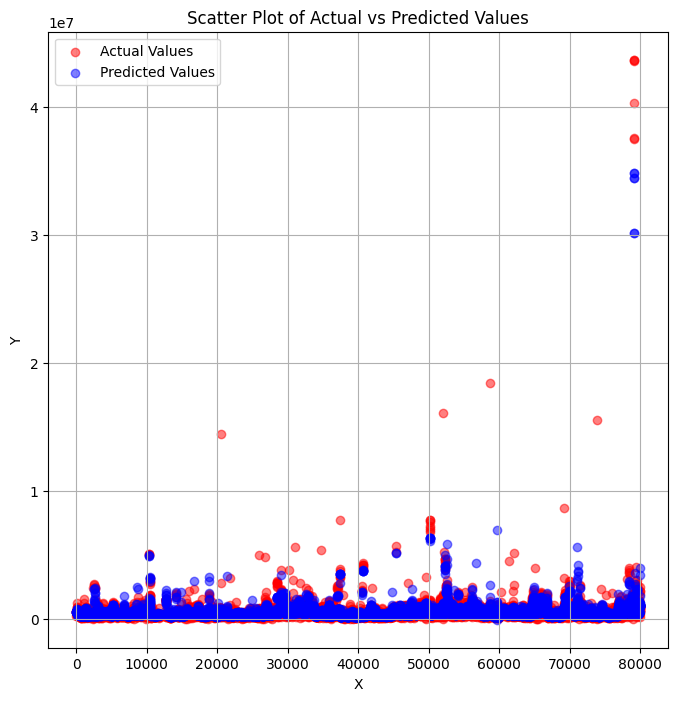

In [51]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Create a scatter plot of the actual vs predicted values
plt.scatter(X_test.index, y_test, color='red', alpha=0.5, label='Actual Values')
plt.scatter(X_test.index, y_pred, color='blue', alpha=0.5, label='Predicted Values')


# Plot the title, labels and legend
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

## RandomForest

In [ ]:
# Create a random forest model pipeline
random_forest_pipe=Pipeline(
    [
        ("model", RandomForestRegressor(random_state=42))
    ]
)

# Create parameter distributions for the random forest model
param_distrib = [
    {'model__max_depth': randint(low=1, high=30),
    'model__n_estimators': randint(100, 600),          # 树的数量
    'model__max_depth': randint(5, 30),               # 最大树深度
    'model__min_samples_split': randint(2, 20),       # 节点分裂所需的最小样本数
    'model__min_samples_leaf': randint(1, 10),        # 叶子节点的最小样本数
    'model__max_features': uniform(0.1, 0.9),         # 最大特征比例（如 10%-90%）
    'model__bootstrap': [True, False],                 # 是否使用自助法采样
     }]

# Using RandomizedSearchCV to find the best hyperparameters for the random forest model
rnd_search = RandomizedSearchCV(random_forest_pipe, param_distributions=param_distrib, cv=10, n_iter=10,
                           scoring={'RMSE': 'neg_root_mean_squared_error', 'R2': 'r2'}, refit='RMSE', n_jobs=-1, random_state=42)

# Fit the random search model
rnd_search.fit(X_train_resample, y_train_resample)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions=[{'model__bootstrap': [True, False],
                                         'model__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1391c3980>,
                                         'model__max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen objec...
                                         'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30e58cb60>,
                                         'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30e58dfa0>,
                                         'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x307174ce0>}],
                   random_state=42, refit='RMSE',
                   scoring={'R2': 'r2', 'RMSE': 'neg_root_mean_squared_error'})

In [1195]:
cv_results = rnd_search.cv_results_

# Get the MSE and R² scores
rmse_scores = -cv_results['mean_test_RMSE']

r2_scores = cv_results['mean_test_R2']

# Output the best scores
best_xg_index = rnd_search.best_index_  
best_xg_rmse = rmse_scores[best_xg_index]
best_xg_r2 = r2_scores[best_xg_index]

print(f"RandomForest RMSE: {best_xg_rmse:.7f}")
print(f"RandomForset R²: {best_xg_r2:.7f}")

RandomForest RMSE: 770155.5451872
RandomForset R²: 0.3176231


In [1196]:
Best_parameters1=rnd_search.best_params_
Best_parameters1

{'model__bootstrap': False,
 'model__max_depth': 29,
 'model__max_features': np.float64(0.14180537144799796),
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 8,
 'model__n_estimators': 120}

In [1197]:
# Save the final model
final_model_rf = rnd_search.best_estimator_

In [1198]:
# Predict the test set by using the final model
y_pred = final_model_rf.predict(X_test_preprocessed)


# Calculate the MSE and R² of the final model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model MSE: {rmse}")
print(f"Final Model R²: {r2}")

/opt/homebrew/Caskroom/miniconda/base/envs/deluge/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Final Model MSE: 402137.6827986964
Final Model R²: 0.8224492436162488


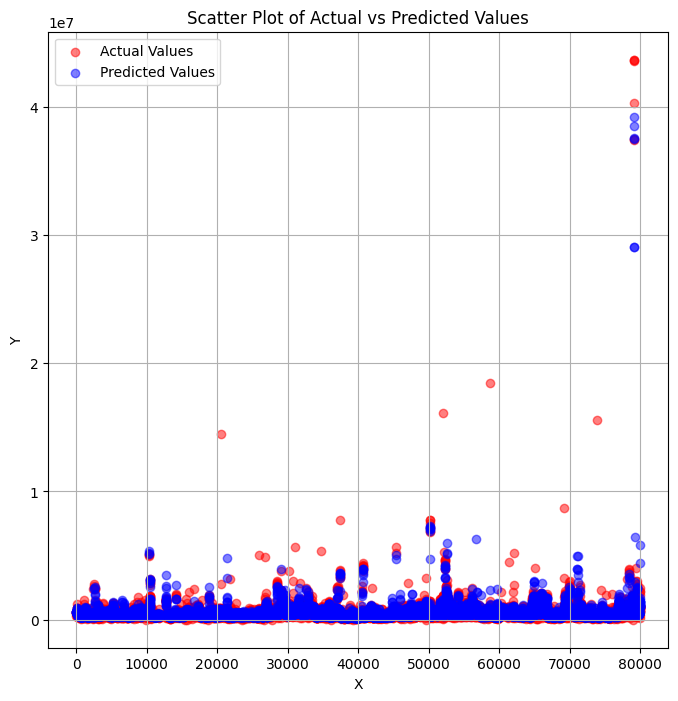

In [1193]:
plt.figure(figsize=(8, 8))

# Create a scatter plot of the actual vs predicted values
plt.scatter(X_test.index, y_test, color='red', alpha=0.5, label='Actual Values')
plt.scatter(X_test.index, y_pred, color='blue', alpha=0.5, label='Predicted Values')


# Plot the title, labels and legend
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()